In [2]:

%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np
import scipy
import matplotlib.pyplot as plt


# switch of the too many warnings...
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


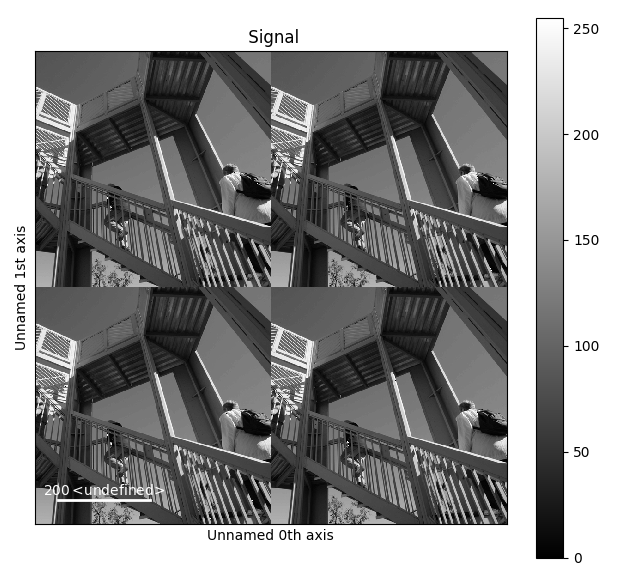

In [2]:
# image mosaic
image = hs.signals.Signal2D(scipy.misc.ascent())
image = hs.stack([hs.stack([image]*2,axis=0)]*2,axis=1)
image.plot()


<IPython.core.display.Javascript object>


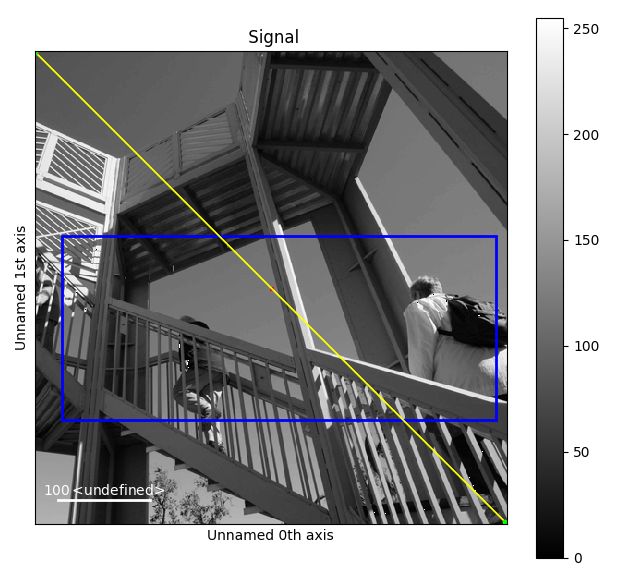

<IPython.core.display.Javascript object>


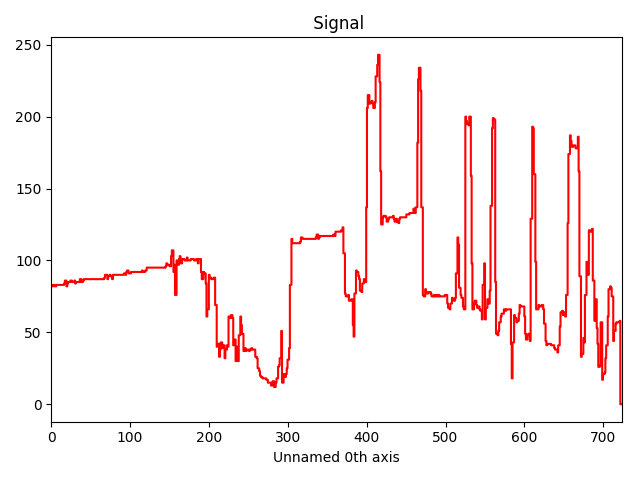

<IPython.core.display.Javascript object>


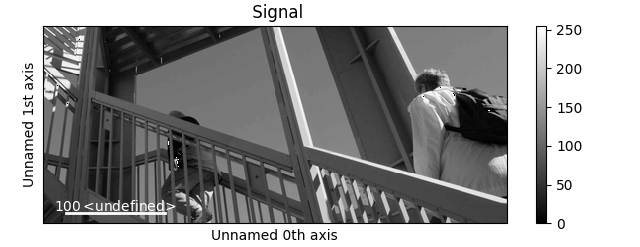

In [3]:
# using ROI's to crop and make linescans
# use the mouse to resize and move the ROI objects
im = hs.signals.Signal2D(scipy.misc.ascent())
rectangular_roi = hs.roi.RectangularROI(left=30, right=500, top=200, bottom=400)
line_roi = hs.roi.Line2DROI(0, 0, 512, 512, 1)
point_roi = hs.roi.Point2DROI(256, 256)
im.plot()
roi2D = rectangular_roi.interactive(im, color="blue")
roi1D = line_roi.interactive(im, color="yellow")
roi0D = point_roi.interactive(im, color="red")
roi1D.plot()
roi2D.plot()

VBox(children=(HBox(children=(FloatText(value=0.43, description='x1'), FloatText(value=0.88, description='x2'))), HBox(children=(FloatText(value=4.0, description='x2'), FloatText(value=0.54, description='y2'))), FloatText(value=0.1, description='linewidth')))

<IPython.core.display.Javascript object>


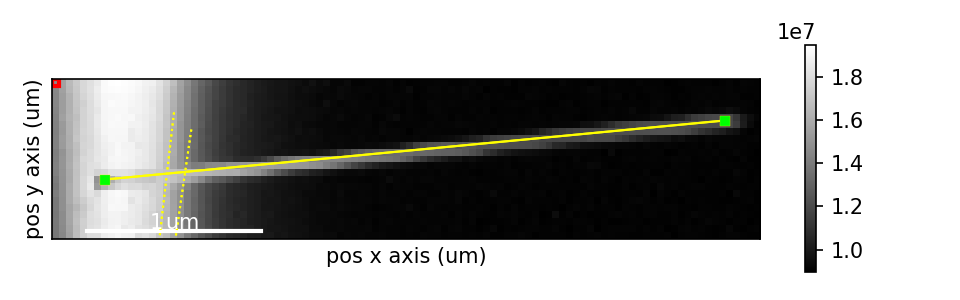

<IPython.core.display.Javascript object>


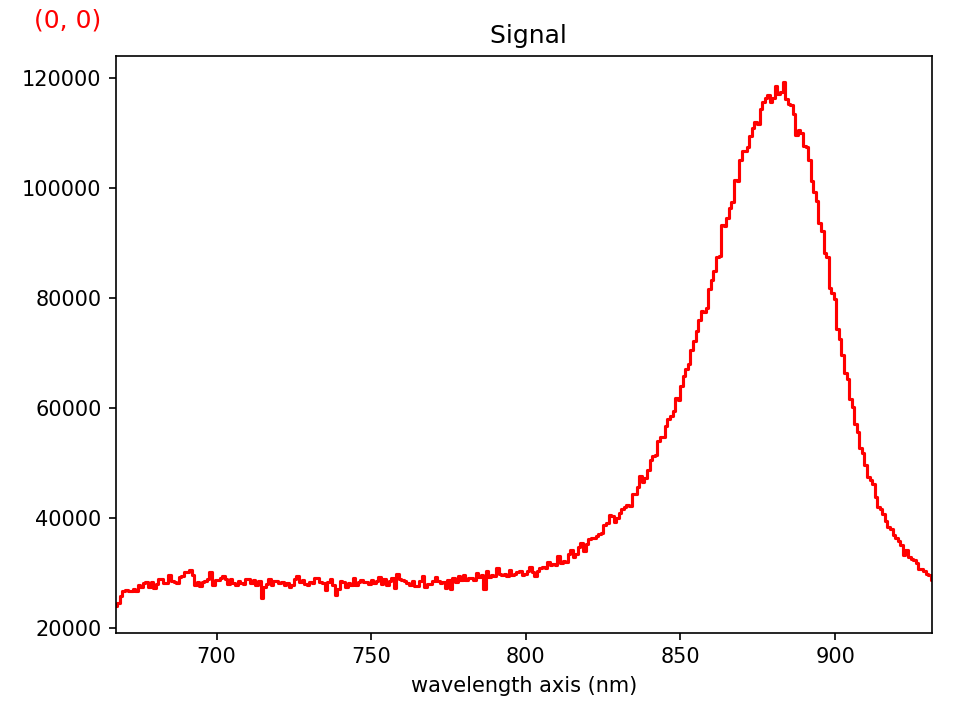

VBox(children=(HBox(children=(Label(value='pos x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=101), BoundedFloatText(value=0.14638844301765677, continuous_update=True, description='value', max=4.186388443017659, min=0.14638844301765677, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), HBox(children=(Label(value='pos y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=22), BoundedFloatText(value=0.32022471910112293, continuous_update=True, description='value', max=1.2002247191011235, min=0.32022471910112293, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


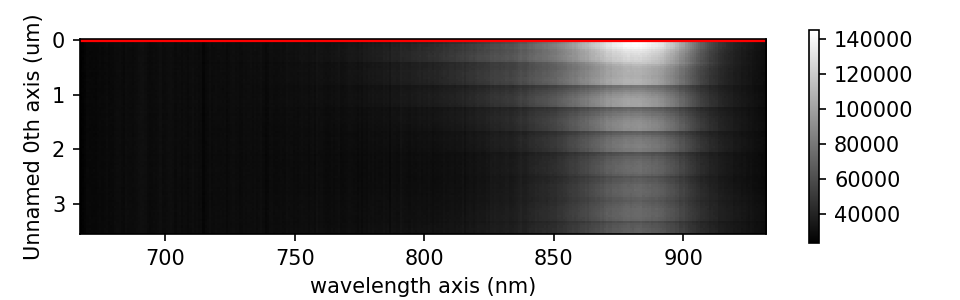

<IPython.core.display.Javascript object>


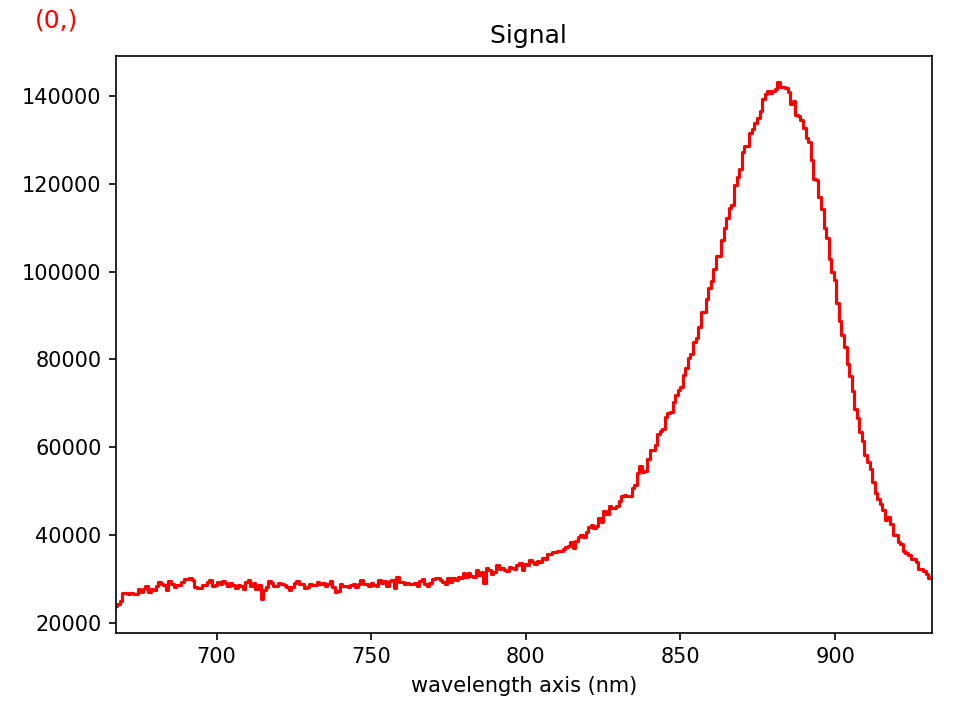

In [3]:

s = hs.load('sampledata/cltest.hspy')
s = s.rebin(scale=[1,1,8]) # reduce data size


line_roi = hs.roi.Line2DROI(0.43, 0.88,4,0.54, 0.1)

line_roi.gui()
s.plot()
s.axes_manager.gui_navigation_sliders()



roi1D = line_roi.interactive(s, color="yellow")
roi1D.plot()
#roi1D.axes_manager.gui_navigation_sliders()




<IPython.core.display.Javascript object>


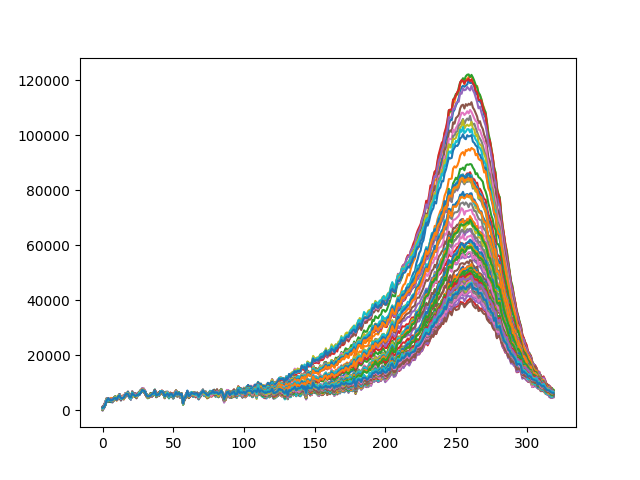

<IPython.core.display.Javascript object>


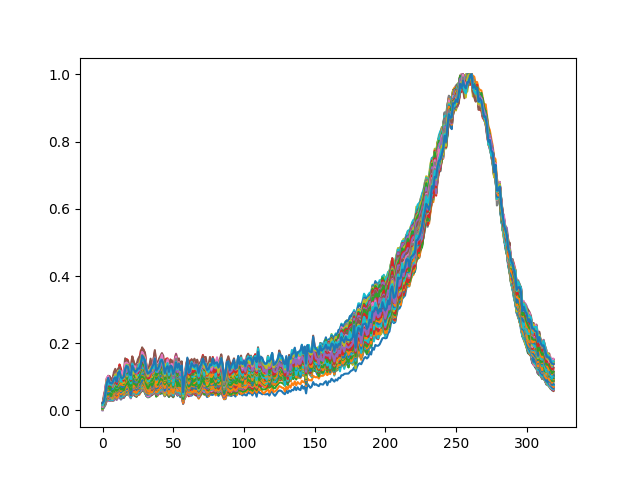

In [4]:
#access the line profile spectra directly:


#normalize the max peak to 1
yn = roi1D.data.copy()
off=np.min(yn)
for k,x in enumerate(yn) :
    yn[k] = (yn[k]-off) / np.max(yn[k]-off)


    
plt.figure()
plt.plot(roi1D.data.T -off)
plt.show()

plt.figure()
plt.plot(yn.T)
plt.show()




In [6]:
roi1D.axes_manager.coordinates

(0.0,)